# 연관분석, 연관규칙 시각화

- 하나의 거래나 사건에 포함된 항목 간의 관련성을 파악하여 둘 이상의 항목들로 구성된 연관성 규칙을 도출하는 탐색적인 분석 방법이다. 
- 예를 들어, 연관분석은 대형마트, 백화점, 쇼핑몰 등에서 고객의 장바구니에 들어있는 품목 간의 관계를 분석하여 마케팅에 활용한다. 
  - 고객들은 어떤 상품들을 동시에 구매하는가?
  - 맥주를 구매한 고객은 주로 어떤 상품을 함께 구매하는가?

- 데이터베이스에서 사건의 연관규칙을 찾는 데이터마이닝 기법.
- y변수가 없으며 비지도학습에 의한 패턴 분석 방법.
- 사건과 사건 간의 연관성을 찾는 방법
- 지지도, 신뢰도, 향상도를 연관규칙의 평가도구로 사용한다. 

- 연관분석 시행 절차
  - 1) 거래 내역 데이터를 대상으로 트랜잭션 객체 생성
  - 2) 품목과 트랜잭션 ID 관찰
  - 3) 평가 척도(지지도, 신뢰도, 향상도)를 이용한 연구규칙 발견
  - 4) 연관분석 결과에 대한 시각화
  - 5) 연관분석 결과 해설 및 업무 적용

- 연관규칙 평가척도 : 연관규칙이란 어떤 사건이 얼마나 자주 동시에 발생하는가를 표현하는 규칙(조건)으로 데이터 내에 포함된 특정 항목들의 연관성을 수치화시켜 나타내는 방법이다. 기본적으로 연관성 규칙은 지지도, 신뢰도, 향상도를 계산하여 연관성의 유무를 판단한다.

- (1) 지지도 : 품목A와 품목 B가 동시에 포함한 거래수 / 전체 거래수
  - A를 구매하고 B를 구매하는 거래
- (2) 신뢰도 : 품목 A와 B를 동시에 포함한 거래수 / 품목 A를 포함한 거래수
  - 품목 A가 구매될 때 품목 B가 구매되는 경우의 조건부확률
  - 품목 A가 포함된 거래 중에서 품목 B를 포함함 거래의 비율을 제공
- (3) 향상도 : 신뢰되 / 품목 B를 포함한 거래율
  - 두 상품의 독립성 여부를 수치로 제공하는데 독립성 여부에 따라서 상품 간의 상관관계를 예측할 수 있다.
  - 향상도 = 1인 경우에는 상품 A와 B는 독립관계(상관관계 없음)
  - 향상도가 1이 아닌 경우에는 상품 A와 B는 독립이 아닌 경우, 즉 종속관계(상관성 있음)
  - 향상도의 값이 클수록 상품 간의 연관성이 높다고 볼 수 있다.

- 연관규칙의 평가척도에서 지지율이 낮다는 의미는 해당 조합의 거래 수가 적다는 의미, 신뢰도가 낮다는 의미는 A상품 구매 시 B상품을 함께 구매하는 거래 수가 적다는 의미, 따라서 지지도와 신뢰도가 높을수록 발견되는 규칙은 적어진다.

In [4]:
library(arules)

# 트랜잭션(상품 거래 정보) 객체 생성
tran = read.transactions('tran.txt', format = 'basket', sep = ',')
tran

# 트랜잭션 데이터 보기
inspect(tran) # 6개 트랜잭션의 항목 출력

transactions in sparse format with
 6 transactions (rows) and
 5 items (columns)

    items             
[1] {라면, 맥주, 우유}
[2] {고기, 라면, 우유}
[3] {고기, 과일, 라면}
[4] {고기, 맥주, 우유}
[5] {고기, 라면, 우유}
[6] {과일, 우유}      


In [6]:
# 규칙(rule) 발견 1
rule = apriori(tran, parameter = list(supp = 0.3, conf = 0.1))
# 16 rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 6 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [9]:
# 규칙 보기
inspect(rule)

     lhs             rhs    support   confidence coverage  lift  count
[1]  {}           => {과일} 0.3333333 0.3333333  1.0000000 1.000 2    
[2]  {}           => {맥주} 0.3333333 0.3333333  1.0000000 1.000 2    
[3]  {}           => {고기} 0.6666667 0.6666667  1.0000000 1.000 4    
[4]  {}           => {라면} 0.6666667 0.6666667  1.0000000 1.000 4    
[5]  {}           => {우유} 0.8333333 0.8333333  1.0000000 1.000 5    
[6]  {맥주}       => {우유} 0.3333333 1.0000000  0.3333333 1.200 2    
[7]  {우유}       => {맥주} 0.3333333 0.4000000  0.8333333 1.200 2    
[8]  {고기}       => {라면} 0.5000000 0.7500000  0.6666667 1.125 3    
[9]  {라면}       => {고기} 0.5000000 0.7500000  0.6666667 1.125 3    
[10] {고기}       => {우유} 0.5000000 0.7500000  0.6666667 0.900 3    
[11] {우유}       => {고기} 0.5000000 0.6000000  0.8333333 0.900 3    
[12] {라면}       => {우유} 0.5000000 0.7500000  0.6666667 0.900 3    
[13] {우유}       => {라면} 0.5000000 0.6000000  0.8333333 0.900 3    
[14] {고기, 라면} => {우유} 0.3333333 0.6666667  0.500

- inspect() 함수를 이용하여 트랜잭션 객체를 확인할 수 있음
- 지지도가 0.3, 신뢰도가 0.1인 경우네는 16개의 규칙이 발견
- 지지도와 신뢰도가 높을수록 발견되는 규칙은 적어진다. 

In [10]:
# 규칙(rule) 발견 2
rule = apriori(tran, parameter = list(supp = 0.1, conf = 0.1))
inspect(rule)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 6 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [35 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs             rhs    support   confidence coverage  lift  count
[1]  {}           => {과일} 0.3333333 0.3333333  1.0000000 1.000 2    
[2]  {}           => {맥주} 0.3333333 0.3333333  1.0000000 1.000 2    
[3]  {}           => {고기} 0.6666667 0.6666667  1.0000000 1.000 4    
[4]  {}           

- 지지도와 신뢰도를 낮게 설정 -> 규칙의 수 증가

---

- 트랜잭션(상품 거래 정보) 객체 생성
  - 연관분석을 위해서 거래 데이터를 대상으로 트랜잭션 객체를 생성

In [11]:
stran = read.transactions('demo_single', format = 'single', cols = c(1,2))
inspect(stran)

    items          transactionID
[1] {item1}        trans1       
[2] {item1, item2} trans2       


- 한 개의 트랜잭션 구분자에 의해서 상품이 연결된 경우 format = 'single' 속성을 지정.
- single 속성을 지정하면 cols 속성으로 처리할 칼럼을 지정한다.

- 중복 트랜잭션 제거
  - 상품이 컴마로 구분되어 있으며, 중복된 트랜잭션이 존재하는 경우 해당 트랜잭션을 제거하기 위해 rm.duplicates = T 속서을 지정하면 된다. 

In [12]:
# 단계 1 : 트랜잭션 데이터 가져오기
stran2 = read.transactions('single_format.csv', format = 'single', sep = ',', cols = c(1,2), rm.duplicates = T)

# 단계 2 : 트랜잭션과 상품수 확인
stran2

transactions in sparse format with
 248 transactions (rows) and
 68 items (columns)

In [13]:
# 단계 3 : 요약통계량 제공
summary(stran2)

transactions as itemMatrix in sparse format with
 248 rows (elements/itemsets/transactions) and
 68 columns (items) and a density of 0.06949715 

most frequent items:
10001519 10003364 10003373 10093119 10003332  (Other) 
     186      183       91       84       71      557 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8 
 12  25  16  20 119  12  37   7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   4.726   5.000   8.000 

includes extended item information - examples:
    labels
1 10000005
2 10000012
3 10000085

includes extended transaction information - examples:
    transactionID
1 2010-01-01-0823
2 2010-01-02-0822
3 2010-01-03-0822

- sizes의 첫 줄은 item 수 이고, 두 번째 줄은 transaction 수이다. 예를 들면 item 수가 1개로 구성된 transaction 수가 12개라는 의미이다. 

In [17]:
# 규칙 발견(생성)
# apriori() 함수는 연관규칙의 평가척도를 이용하여 규칙을 생성한다.

# 단계 1 : 규칙 생성하기
astran2 = apriori(stran2) # supp = 0.1, conf = 0.8과 동일, 이게 default 값임

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[68 item(s), 248 transaction(s)] done [0.00s].
sorting and recoding items ... [12 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [102 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [18]:
# 발견된 규칙 보기
inspect(astran2)

      lhs                                         rhs        support  
[1]   {10003349}                               => {10003364} 0.1088710
[2]   {10003349}                               => {10001519} 0.1088710
[3]   {10202857}                               => {10003364} 0.1330645
[4]   {10202857}                               => {10001519} 0.1330645
[5]   {10002195}                               => {10003364} 0.1370968
[6]   {10002195}                               => {10001519} 0.1370968
[7]   {10200597}                               => {10003364} 0.1814516
[8]   {10200597}                               => {10001519} 0.1814516
[9]   {10003374}                               => {10003373} 0.1935484
[10]  {10003374}                               => {10003364} 0.1935484
[11]  {10003374}                               => {10001519} 0.1935484
[12]  {10003375}                               => {10093119} 0.1814516
[13]  {10003375}                               => {10003364} 0.2177419
[14]  

In [19]:
# 상위 5개의 향상도를 내림차순으로 정렬하여 출력
inspect(head(sort(astran2, by = 'lift')))

    lhs                                         rhs        support   confidence
[1] {10003332, 10003373}                     => {10003374} 0.1330645 0.9705882 
[2] {10003332, 10003364, 10003373}           => {10003374} 0.1330645 0.9705882 
[3] {10001519, 10003332, 10003373}           => {10003374} 0.1330645 0.9705882 
[4] {10001519, 10003332, 10003364, 10003373} => {10003374} 0.1330645 0.9705882 
[5] {10003332, 10093119}                     => {10003375} 0.1048387 1.0000000 
[6] {10003332, 10003364, 10093119}           => {10003375} 0.1048387 1.0000000 
    coverage  lift     count
[1] 0.1370968 4.912365 33   
[2] 0.1370968 4.912365 33   
[3] 0.1370968 4.912365 33   
[4] 0.1370968 4.912365 33   
[5] 0.1048387 4.509091 26   
[6] 0.1048387 4.509091 26   


In [21]:
# basket 형식으로 트랜잭션 객체 생성
btran = read.transactions('demo_basket',format = 'basket', sep = ',')
inspect(btran)

    items         
[1] {item1, item2}
[2] {item1}       
[3] {item2, item3}


- 트랜잭션 구분자없이 상품으로만 구성된 데이터 셋을 대상으로 트랜잭션 객체를 생성할 경우 format = 'basket' 속성을 지정한다. 

---

- 연관규칙 시각화

In [26]:
data(Adult)
str(Adult)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:612200] 1 10 25 32 35 50 59 61 63 65 ...
  .. .. ..@ p       : int [1:48843] 0 13 26 39 52 65 78 91 104 117 ...
  .. .. ..@ Dim     : int [1:2] 115 48842
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	115 obs. of  3 variables:
  .. ..$ labels   : chr [1:115] "age=Young" "age=Middle-aged" "age=Senior" "age=Old" ...
  .. ..$ variables: Factor w/ 13 levels "age","capital-gain",..: 1 1 1 1 13 13 13 13 13 13 ...
  .. ..$ levels   : Factor w/ 112 levels "10th","11th",..: 111 63 92 69 30 54 65 82 90 91 ...
  ..@ itemsetInfo:'data.frame':	48842 obs. of  1 variable:
  .. ..$ transactionID: chr [1:48842] "1" "2" "3" "4" ...


In [27]:
Adult

transactions in sparse format with
 48842 transactions (rows) and
 115 items (columns)

- 성인을 대상으로 인구 소득에 관한 설문 조사 데이터를 포함하고 있는 AdultUCI 데이터 셋을 트랜잭션 객체로 변환하여 준비된 데이터 셋.

In [28]:
data('AdultUCI')
str(AdultUCI)

'data.frame':	48842 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 8 levels "Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Ord.factor w/ 16 levels "Preschool"<"1st-4th"<..: 14 14 9 7 14 15 5 9 15 14 ...
 $ education-num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital-status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 14 levels "Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital-gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital-loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours-per-week: int  40

In [29]:
# data.frame 형식으로 보기
adult = as(Adult, 'data.frame')
str(adult)

'data.frame':	48842 obs. of  2 variables:
 $ items        : chr  "{age=Middle-aged,workclass=State-gov,education=Bachelors,marital-status=Never-married,occupation=Adm-clerical,r"| __truncated__ "{age=Senior,workclass=Self-emp-not-inc,education=Bachelors,marital-status=Married-civ-spouse,occupation=Exec-ma"| __truncated__ "{age=Middle-aged,workclass=Private,education=HS-grad,marital-status=Divorced,occupation=Handlers-cleaners,relat"| __truncated__ "{age=Senior,workclass=Private,education=11th,marital-status=Married-civ-spouse,occupation=Handlers-cleaners,rel"| __truncated__ ...
 $ transactionID: chr  "1" "2" "3" "4" ...


In [30]:
head(adult)

,items,transactionID
,<chr>,<chr>
1,"{age=Middle-aged,workclass=State-gov,education=Bachelors,marital-status=Never-married,occupation=Adm-clerical,relationship=Not-in-family,race=White,sex=Male,capital-gain=Low,capital-loss=None,hours-per-week=Full-time,native-country=United-States,income=small}",1
2,"{age=Senior,workclass=Self-emp-not-inc,education=Bachelors,marital-status=Married-civ-spouse,occupation=Exec-managerial,relationship=Husband,race=White,sex=Male,capital-gain=None,capital-loss=None,hours-per-week=Part-time,native-country=United-States,income=small}",2
3,"{age=Middle-aged,workclass=Private,education=HS-grad,marital-status=Divorced,occupation=Handlers-cleaners,relationship=Not-in-family,race=White,sex=Male,capital-gain=None,capital-loss=None,hours-per-week=Full-time,native-country=United-States,income=small}",3
4,"{age=Senior,workclass=Private,education=11th,marital-status=Married-civ-spouse,occupation=Handlers-cleaners,relationship=Husband,race=Black,sex=Male,capital-gain=None,capital-loss=None,hours-per-week=Full-time,native-country=United-States,income=small}",4
5,"{age=Middle-aged,workclass=Private,education=Bachelors,marital-status=Married-civ-spouse,occupation=Prof-specialty,relationship=Wife,race=Black,sex=Female,capital-gain=None,capital-loss=None,hours-per-week=Full-time,native-country=Cuba,income=small}",5
6,"{age=Middle-aged,workclass=Private,education=Masters,marital-status=Married-civ-spouse,occupation=Exec-managerial,relationship=Wife,race=White,sex=Female,capital-gain=None,capital-loss=None,hours-per-week=Full-time,native-country=United-States,income=small}",6


In [33]:
# 요약통계량
summary(Adult)
# 아이템에 해당하는 트랜잭션 개수를 확인할 수 있다.

transactions as itemMatrix in sparse format with
 48842 rows (elements/itemsets/transactions) and
 115 columns (items) and a density of 0.1089939 

most frequent items:
           capital-loss=None            capital-gain=None 
                       46560                        44807 
native-country=United-States                   race=White 
                       43832                        41762 
           workclass=Private                      (Other) 
                       33906                       401333 

element (itemset/transaction) length distribution:
sizes
    9    10    11    12    13 
   19   971  2067 15623 30162 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   12.00   13.00   12.53   13.00   13.00 

includes extended item information - examples:
           labels variables      levels
1       age=Young       age       Young
2 age=Middle-aged       age Middle-aged
3      age=Senior       age      Senior

includes extended transaction information - examp

In [34]:
# 지지도 10%와 신뢰도 80%가 적용된 연관규칙 발견
ar = apriori(Adult, parameter = list(supp = 0.1, conf = 0.8))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4884 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.03s].
sorting and recoding items ... [31 item(s)] done [0.01s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.07s].
writing ... [6137 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


- apriori() 함수는 알고리즘을 적용하여 연관규칙을 발견하는 함수이다. 신뢰도 80%와 지지도 10%를 적용하여 연관규칙을 생성하면 6137개의 규칙이 발견된다.

In [37]:
# 단계 1 : 지지도를 20%로 향상
ar1 = apriori(Adult, parameter = list(supp=0.2))
# 규칙 1306개

# 단계 3 : 지지도 30%, 신뢰도 95%
ar3 = apriori(Adult, parameter = list(supp = 0.3, conf = 0.95))

# 단계 5 : 지지도 40%, 신뢰도 95%로 높인 경우
ar5 = apriori(Adult, parameter = list(supp = 0.4, conf = 0.95))
# 규칙 36개

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9768 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.03s].
sorting and recoding items ... [18 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 done [0.00s].
writing ... [1306 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.95    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load so

- 지지도와 신뢰도에 따라서 규칙의 수가 달라지는 것을 확인할 수 있다. 
- 지지도와 신뢰도가 높아질수록 규칙의 수는 줄어든다.
- 또한 신뢰도 또는 향상도를 기준으로 내림차순 정렬하여 연관규칙 결과를 확인할 수 있다. 

---

- 연관규칙 시각화

also installing the dependencies 'tweenr', 'polyclip', 'RcppArmadillo', 'TSP', 'qap', 'gclus', 'registry', 'ggforce', 'ggrepel', 'tidygraph', 'graphlayouts', 'crosstalk', 'seriation', 'vcd', 'igraph', 'ggraph', 'DT', 'plotly', 'visNetwork'




package 'tweenr' successfully unpacked and MD5 sums checked
package 'polyclip' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'ggforce' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked
package 'tidygraph' successfully unpacked and MD5 sums checked
package 'graphlayouts' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked
package 'seriation' successfully unpacked and MD5 sums checked
package 'vcd' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'ggraph' successfully unpacked and MD5 sums checked
package 'DT' successfu

Warning message:
"Unknown control parameters: type"


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


Warning message:
"Too many rules supplied. Only plotting the best 100 using 'lift' (change control parameter max if needed)."


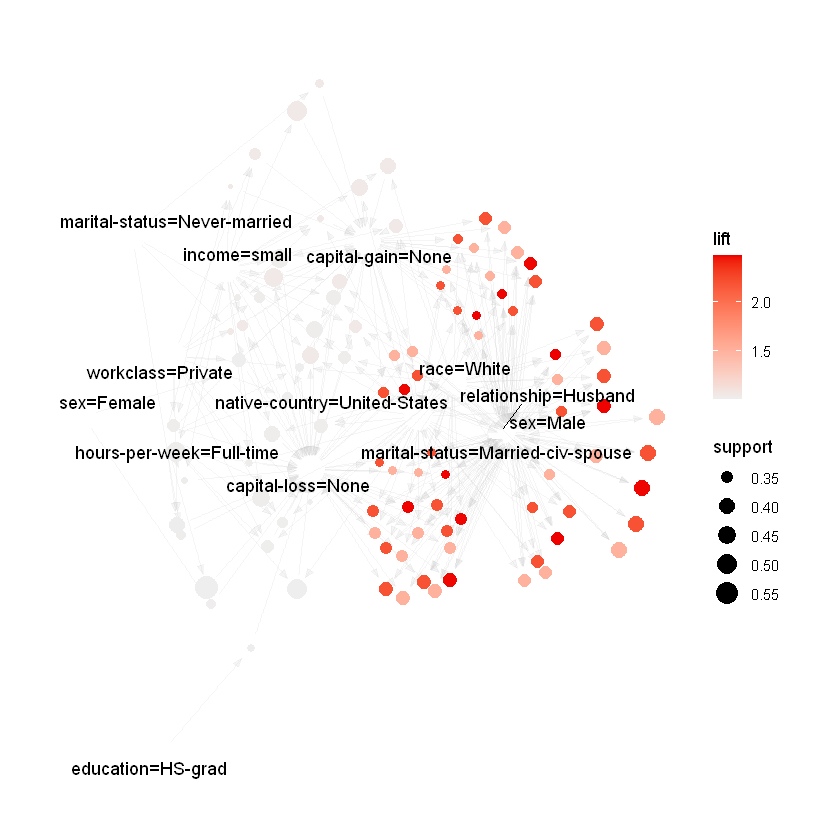

In [38]:
install.packages('arulesViz')
library(arulesViz)

# 연관규칙 시각화
plot(ar3, method = 'graph', control = list(type='items'))

- control 속성은 생략 가능하다. 

- 124개의 연관규칙은 지나치게 많아서 최적의 규칙 100개만 지원됐다.
- 시각화 결과
  - 5만 달러 이상의 연봉 수령자와 관련 연관어는 정규직, 백인, 미국 ,자본 손실 없음, 직업은 자영업 등으로 나타난다. 

---

- Groceries 데이터 셋으로 연관분석

In [39]:
data('Groceries')

- 1개월 동안 실제 지역 식료품매장에서 판매되는 트랜잭션 데이터를 포함하고 있다.

In [40]:
# data.frame으로 형 변환
Groceries.df = as(Groceries, 'data.frame')
head(Groceries.df)

,items
,<chr>
1,"{citrus fruit,semi-finished bread,margarine,ready soups}"
2,"{tropical fruit,yogurt,coffee}"
3,{whole milk}
4,"{pip fruit,yogurt,cream cheese ,meat spreads}"
5,"{other vegetables,whole milk,condensed milk,long life bakery product}"
6,"{whole milk,butter,yogurt,rice,abrasive cleaner}"


In [41]:
# 지지도 0.001, 신뢰도 0.8 적용하여 규칙 발견
rules = apriori(Groceries, parameter = list(supp=0.001, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


- 규칙을 구성하는 왼쪽(LHS) -> 오른쪽(RHS)의 item 빈도수 보기

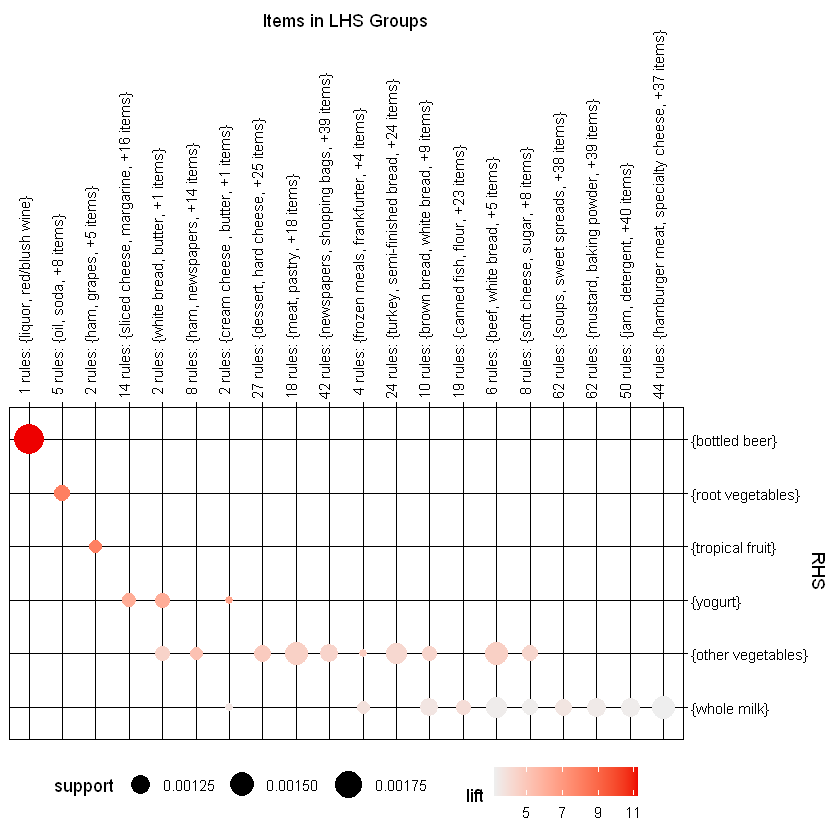

In [43]:
plot(rules, method = 'grouped')

In [44]:
# 최대 길이가 3이하인 규칙 생성
rules = apriori(Groceries, parameter = list(supp=0.001, conf=0.8, maxlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8, :
"Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!"


 done [0.01s].
writing ... [29 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [45]:
# confidence 기준 내림차순으로 규칙 정렬
rules = sort(rules, decreasing = T, by = 'confidence')
inspect(rules)

     lhs                         rhs                    support confidence    coverage      lift count
[1]  {rice,                                                                                           
      sugar}                  => {whole milk}       0.001220132  1.0000000 0.001220132  3.913649    12
[2]  {canned fish,                                                                                    
      hygiene articles}       => {whole milk}       0.001118454  1.0000000 0.001118454  3.913649    11
[3]  {whipped/sour cream,                                                                             
      house keeping products} => {whole milk}       0.001220132  0.9230769 0.001321810  3.612599    12
[4]  {rice,                                                                                           
      bottled water}          => {whole milk}       0.001220132  0.9230769 0.001321810  3.612599    12
[5]  {soups,                                                             

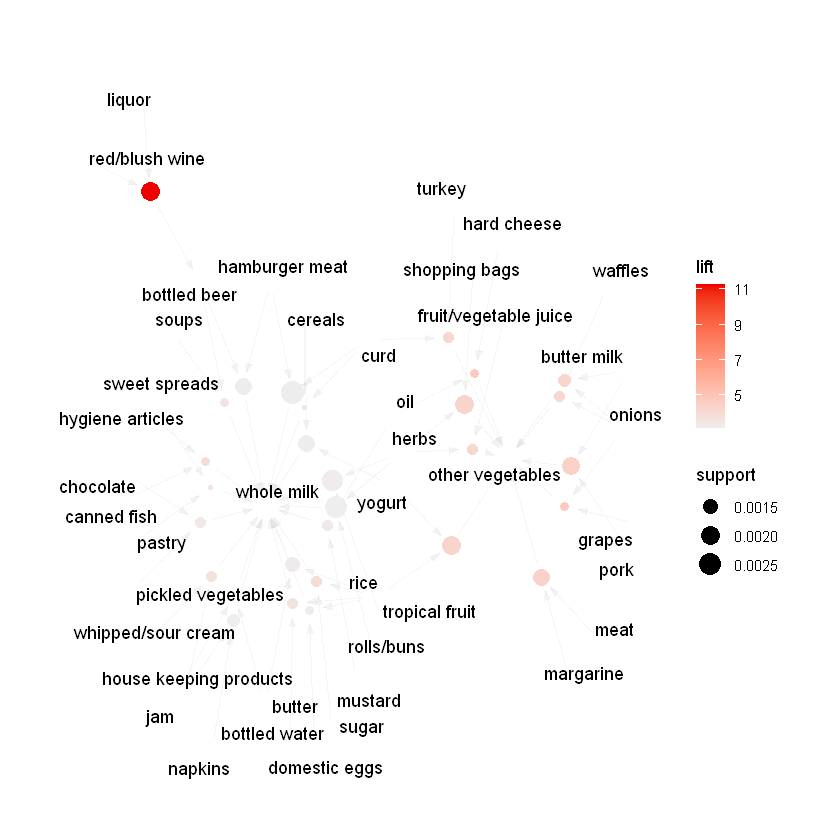

In [46]:
library(arulesViz) # 연관규칙 시각화를 위한 패키지 로딩
plot(rules, method = 'graph')